### 姓名：宋广晨    学号：201921210041

### 项目名称：基于深度学习的图像分类器
数据集：猫狗分类数据集 下载地址为https://www.kaggle.com/c/dogs-vs-cats/data  

项目及背景描述：这个数据集共包含25000张中等分辨率彩色图像，其中猫和狗的图片各12500张。且这些图片在尺寸方面大小不同。压缩后数据集大小为534M。但为了更清晰的展示出基于深度学习的各种提高精确度的改进方法，这里只使用2000张图片用于训练，1000张图片用于测试。  

开发平台：基于tensorflow 2.1的keras框架  

项目流程简介：这个项目中，首先通过程序建立多级目录，将解压后的数据集分别放入不同的目录中。接着构建基本的卷积神经网络，加载图片并进行预处理（jpg图片转换成RGB像素张量，统一大小尺寸等），然后送入构建的神经网络分类器中训练，将训练的结果画图显示。通过多次分析训练过程中产生的数据，提出改进方向。分别先后加入数据增强技术、Dropout技术、预训练技术、模型微调技术等，逐步提高模型的测试精确度。最后可视化模型前8层各层的特征图，可以观察出典型卷积神经网络的模型的工作原理以及中间过程。

#### step 1 : 加载数据

In [1]:
import os,shutil

# 为了训练起来快一些，同时该程序只是为了说明CV的流程，所以只选择原始数据集中的一小部分进行训练
# original_dataset_diroriginal_dataset_dir是原始的数据集解压目录
# base_dir是从原始数据集中选的一小部分的数据集的保存目录
# 其中的目录结构为：
# |base_dir
# |----|train_dir
# |----|----dogs
# |----|----cats
# |----|validation_dir
# |----|----dogs
# |----|----cats
# |----|test_dir
# |----|----dogs
# |----|----cats

# 这个用程序建立文件夹复制图像的操作还是有必要的，便于移植程序到别的电脑上执行。到时候只需要改一下数据集解压后的目录original_dataset_dir和建立新的小数据集的目录位置base_dir就可以了

original_dataset_dir = 'D:\\Python\\datasets\\dogs-vs-cats\\train'

base_dir = 'D:\\Python\\datasets\\dogs-vs-cats\\small'

train_dir = os.path.join(base_dir,'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_dir = os.path.join(base_dir,'validation')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_dir = os.path.join(base_dir,'test')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

if os.path.isdir(base_dir):
    print('This directory is already exist!')
else:
    os.mkdir(base_dir)

    #train_dir = os.path.join(base_dir,'train')
    os.mkdir(train_dir)
    #validation_dir = os.path.join(base_dir,'validation')
    os.mkdir(validation_dir)
    #test_dir = os.path.join(base_dir,'test')
    os.mkdir(test_dir)

    #train_cats_dir = os.path.join(train_dir,'cats')
    os.mkdir(train_cats_dir)
    #train_dogs_dir = os.path.join(train_dir,'dogs')
    os.mkdir(train_dogs_dir)

    #validation_cats_dir = os.path.join(validation_dir,'cats')
    os.mkdir(validation_cats_dir)
    #validation_dogs_dir = os.path.join(validation_dir,'dogs')
    os.mkdir(validation_dogs_dir)

    #test_cats_dir = os.path.join(test_dir,'cats')
    os.mkdir(test_cats_dir)
    #test_dogs_dir = os.path.join(test_dir,'dogs')
    os.mkdir(test_dogs_dir)

    # 将前1000张猫的图像复制到train_cats_dir,接下来500张给validation_cats_dir,接下来500张给test_cats_dir
    # 狗的图片也同理放到对应的三个文件夹里
    fnames_cats = []
    for i in range(2000):
        name = 'cat.{}.jpg'.format(i)
        fnames_cats.append(name)

    for fname in fnames_cats[:1000]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_cats_dir,fname)
        shutil.copyfile(src,dst)

    for fname in fnames_cats[1000:1500]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(validation_cats_dir,fname)
        shutil.copyfile(src,dst)

    for fname in fnames_cats[1500:2000]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_cats_dir,fname)
        shutil.copyfile(src,dst)

    fnames_dogs = []
    for i in range(2000):
        name = 'dog.{}.jpg'.format(i)
        fnames_dogs.append(name)

    for fname in fnames_dogs[:1000]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_dogs_dir,fname)
        shutil.copyfile(src,dst)

    for fname in fnames_dogs[1000:1500]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(validation_dogs_dir,fname)
        shutil.copyfile(src,dst)

    for fname in fnames_dogs[1500:2000]:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_dogs_dir,fname)
        shutil.copyfile(src,dst)

This directory is already exist!


#### step 2 : 构建网络模型

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

#from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#### step3: 数据预处理
主要包括以下4个步骤:  
(1) 读取图片  
(2) 将jpeg图片转换成RGB像素网格  
(3) 将像素网格转换成浮点型张量  
(4) 将[0,255]区间的浮点型张量缩小到[0,1]  
这些操作可以自己写一个函数完成，也可以调用ImageDataGenerator

In [3]:

# 注意：这里的程序有个坑：用ImageDataGenerator的时候，需要在对应的conda环境中安装pillow包，否则会报错。因为ImageDataGenerator调用了一个图像处理的函数，这个函数由pillow包提供。
# 当初在这里卡了好久，甚至一度怀疑keras的版本问题。据了解《Deep Learning with Python》的代码可以在keras-2.2.4 版本下全部调通。所以学习时最好还是跟它保持一致。目前我用的keras环境是2.3.1，而keras-2.2.4版本需要tensorflow-1.x版本。然而，经过验证发现tf2.x版本中自带了keras-2.2.4，叫做“keras-2.2.4 tf版”，目前使用暂时没有发现和keras的区别。所以为了保险起见可以把import keras换成import tenforflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # x_train directory
    target_size=(150,150),
    batch_size=20,
    class_mode='binary' # y_train class label
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

print(type(validation_generator))

for data_batch,labels_batch in validation_generator:
    print('data batch shape: ',data_batch.shape)
    print('label batch shape: ',labels_batch.shape)
    break


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>
data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


#### step 4 : 模型拟合
#### 这个例子中由于使用了图像数据生成器这个对象来批量预处理图片，所以模型拟合时也不能像以前一样用model.fit函数，而是改用model.fit_generator函数。大体原理还是一样的，只是参数上有细微差别。以后用到的时候重新查阅一下就知道了。
#### 需要解释的参数是steps_per_epoch. 由于采用小批量随机梯度下降法，在以前的模型中，使用fit()函数，需要指定batch_size(每一步梯度下降考虑多少个样本数据)，至于一个epoch中执行多少轮梯度下降，由程序自动计算得出(样本总量除以batch_size)。而在这个例子中使用ImageDataGenerator，在train_generator和test_generator中都已经指定了batchs_size，但在fit_generator()函数中需要手动指定在一个epoch中执行多少轮梯度下降。steps_per_epoch即表示在一个epoch中执行多少轮梯度下降
#### validation_data这个参数可以传入一个numpy数组组成的元组，也可以传入一个生成器。这个例子中传入了一个生成器。由于生成器中只说了一个batch_size是20个，所以需要指定取多少个batch用于评估。validation_steps表示需要取多少个batch用于评估

In [4]:
# step 4 : 模型拟合

def get_generator(image_generator):
    for item in image_generator:
        yield item

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

# 在训练完成后保存模型
model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6891 - acc: 0.5350 - val_loss: 0.6794 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 3s 28ms/step - loss: 0.6500 - acc: 0.6325 - val_loss: 0.6337 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 3s 28ms/step - loss: 0.5943 - acc: 0.6855 - val_loss: 0.6086 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 3s 28ms/step - loss: 0.5619 - acc: 0.7035 - val_loss: 0.6162 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 3s 28ms/step - loss: 0.5419 - acc: 0.7270 - val_loss: 0.5879 - val_acc: 0.7010
Epoch 6/30
100/100 [==============================] - 3s 27ms/step - loss: 0.5186 - acc: 0.7395 - val_loss: 0.6116 - val_acc: 0.6720
Epoch 7/30
100/100 [===========

In [5]:
import tensorflow as tf
import keras

print(tf.keras.__version__)

2.2.4-tf


Using TensorFlow backend.


#### step 5 : 训练结果可视化

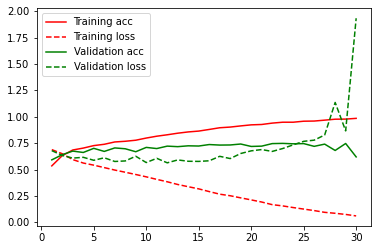

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'r',label='Training acc')
plt.plot(epochs,loss,'r--',label='Training loss')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.plot(epochs,val_loss,'g--',label='Validation loss')
plt.legend()

plt.show()

#### 结果分析：
#### 从图像中我们可以观察到，随着训练轮次的增加，训练精度稳定上升，训练损失稳定下降；而验证精度和验证损失在第10轮左右就开始反弹震荡。显然这说明此时已经出现了过拟合的情况，原因是训练样本较少和模型参数量较多导致的。于是接下来我们分别从这两个方面入手解决。

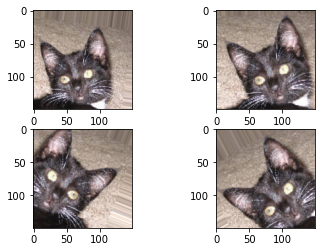

In [7]:
# 先看一个数据增强的demo
# 利用ImageDataGenerator完成图片的数据增强
datagen = ImageDataGenerator(
    rotation_range=40,  #图像随即旋转的角度值，范围0-180
    width_shift_range=0.2,
    height_shift_range=0.2, # 图像在水平或垂直方向上平移的范围(相对于总宽度或总高度的比例)
    shear_range=0.2,    # 随机错切变换的角度范围(比如矩形的高不变，把它拉成平行四边形.具体百度搜索)
    zoom_range=0.2, # 图像随机缩放的范围
    horizontal_flip=True,   # 随机将一半图像水平翻转
    fill_mode='nearest')

# 显示几个随机增强后的训练图像
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = []
for fname in os.listdir(train_cats_dir):
    fnames.append(os.path.join(train_cats_dir,fname))

img_path = fnames[5]    #选择一张图像进行增强
img = image.load_img(img_path,target_size=(150,150))    #读取图像并调整大小

x = image.img_to_array(img) #转成形状为(150,150,3)的数组
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    #plt.figure(i)
    plt.subplot(2,2,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

plt.show()

#### 改进点1 : 使用数据增强处理训练集，并重新优化网络架构，进行训练

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 60 steps, validate for 30 steps
Epoch 1/100
60/60 [==============================] - 9s 151ms/step - loss: 0.6933 - acc: 0.5236 - val_loss: 0.6880 - val_acc: 0.4938
Epoch 2/100
60/60 [==============================] - 8s 137ms/step - loss: 0.6869 - acc: 0.5410 - val_loss: 0.6755 - val_acc: 0.5938
Epoch 3/100
60/60 [==============================] - 8s 138ms/step - loss: 0.6805 - acc: 0.5730 - val_loss: 0.6622 - val_acc: 0.6031
Epoch 4/100
60/60 [==============================] - 8s 138ms/step - loss: 0.6724 - acc: 0.5683 - val_loss: 0.6630 - val_acc: 0.5760
Epoch 5/100
60/60 [==============================] - 8s 138ms/step - loss: 0.6617 - acc: 0.5982 - val_loss: 0.6404 - val_acc: 0.6229
Epoch 6/100
60/60 [==============================] - 8s 138ms/step - loss: 0.6536 - acc: 0.6182 - val_loss: 0.6484 - val_acc: 0.6156
Epoch 7/100
60/60 [=======

60/60 [==============================] - 8s 138ms/step - loss: 0.4627 - acc: 0.7805 - val_loss: 0.4725 - val_acc: 0.7688
Epoch 61/100
60/60 [==============================] - 8s 138ms/step - loss: 0.4516 - acc: 0.7815 - val_loss: 0.5044 - val_acc: 0.7583
Epoch 62/100
60/60 [==============================] - 8s 137ms/step - loss: 0.4670 - acc: 0.7694 - val_loss: 0.5130 - val_acc: 0.7406
Epoch 63/100
60/60 [==============================] - 8s 138ms/step - loss: 0.4584 - acc: 0.7792 - val_loss: 0.4658 - val_acc: 0.7812
Epoch 64/100
60/60 [==============================] - 8s 137ms/step - loss: 0.4574 - acc: 0.7841 - val_loss: 0.4631 - val_acc: 0.7969
Epoch 65/100
60/60 [==============================] - 8s 138ms/step - loss: 0.4571 - acc: 0.7841 - val_loss: 0.4940 - val_acc: 0.7656
Epoch 66/100
60/60 [==============================] - 8s 137ms/step - loss: 0.4590 - acc: 0.7920 - val_loss: 0.5474 - val_acc: 0.7427
Epoch 67/100
60/60 [==============================] - 8s 139ms/step - loss:

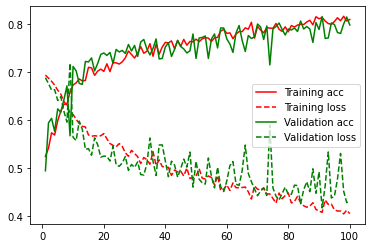

In [8]:
# 训练集数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)   #注意：不能增强测试/验证数据

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 图片源目录
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

# 优化模型的网络架构(加入dropout)
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

# 训练网络
history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=30
)

model.save('cats_and_dogs_small_2.h5')  #保存模型

# 训练结果可视化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'r',label='Training acc')
plt.plot(epochs,loss,'r--',label='Training loss')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.plot(epochs,val_loss,'g--',label='Validation loss')
plt.legend()

plt.show()

#### 改进点2 : 利用预训练模型
对于小数据集上的深度学习来说，使用预训练的方法可以大大提高性能。  
CNN的架构可以大体分为卷积-池化层部分（即“卷积基”）和全连接层部分（即“分类器”）  
计算机视觉问题中，通常可以重复利用卷积基，然后在后面接一个新的分类器。  
原因很简单，因为对于CNN典型架构来说，卷积基部分用于提取特征（从细微到抽象），分类器部分用于分类。迁移的过程中，提取特征的操作有很强的可借鉴性，而分类器与最终的任务强相关，如果任务不同，分类器通常不能通用。  
这个程序中，我们使用在ImageNet上预训练好的VGG16网络的卷积基。这个预训练的图像分类模型已经包含在keras中，我们只需要将其实例化即可。
#### 使用预训练模型，有两种方法：分别是速度较快的“不使用数据增强的特征提取”和速度较慢的“使用数据增强的特征提取”。下面分别使用两种方法并进行对比。

In [3]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet', # 指定模型初始化使用的check_point
    include_top=False,  # 是否包含最后的密集连接分类器
    input_shape=(150,150,3))    # 输入到网络中的图像张量的形状；如果不指定，则网络可以处理任意形状的输入
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### 1. 不使用数据增强的快速特征提取
#### 把训练数据先送入conv_base模型中进行特征提取，形成一个新的numpy张量。然后把这个张量送入自己定义的全连接网络分类器中。

base_dir D:\Python\datasets\dogs-vs-cats\small
train_dir D:\Python\datasets\dogs-vs-cats\small\train
validation_dir D:\Python\datasets\dogs-vs-cats\small\validation
test_dir D:\Python\datasets\dogs-vs-cats\small\test
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 391us/sample - loss: 0.5977 - acc: 0.6800 - val_loss: 0.4598 - val_acc: 0.8310
Epoch 2/30
2000/2000 [==============================] - 0s 219us/sample - loss: 0.4404 - acc: 0.8060 - val_loss: 0.3719 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 0s 211us/sample - loss: 0.3647 - acc: 0.8500 - val_loss: 0.3262 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 0s 219us/sample - loss: 0.3119 - acc: 0.8735 - val_loss: 0.3031 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 0

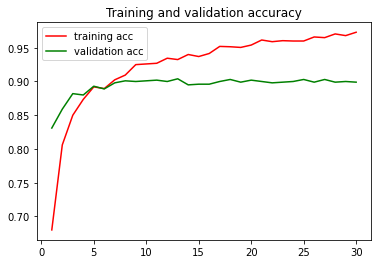

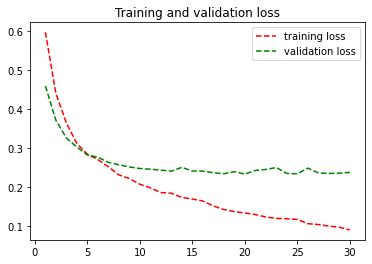

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('base_dir',base_dir)
print('train_dir',train_dir)
print('validation_dir',validation_dir)
print('test_dir',test_dir)

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for input_batch,labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features,labels

train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_lables = extract_features(test_dir,1000)

# 目前features的形状是(sample_count,4,4,512)，送入密集链接层之前需要把(4,4,512)的feature map拉成一维向量
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

# 定义并训练卷积基后面的分类器
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    train_features,train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features,validation_labels)
)

import matplotlib.pyplot as plt

train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'r',label='training acc')
plt.plot(epochs,val_acc,'g',label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss,'r--',label='training loss')
plt.plot(epochs,val_loss,'g--',label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 2. 使用数据增强的特征提取
数据方面：对原训练数据进行数据增强，相当于每一轮epoch送入的训练数据都不同。  
网络模型方面：在conv_base的后面接上一个新的全连接网络分类器，形成一个新的网络模型
#### 由于对原有的训练数据进行了数据增强，数据增强后的每一张图片都送入了conv_base进行运算，所以计算量相对于第1种方法来说大大增加，需要GPU进行运算。

the number of trainable weights before freezing :  30
the number of trainable weights after freezing :  4
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 0.5984 - acc: 0.6725 - val_loss: 0.4636 - val_acc: 0.8240
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.4760 - acc: 0.7875 - val_loss: 0.3688 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 11s 106ms/step - loss: 0.4376 - acc: 0.8105 - val_loss: 0.3353 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 11s 106ms/step - loss: 0.4073 - acc: 0.8205 - val_loss: 0.3063 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 11s 106ms/step - loss: 0.3794 - acc: 0.8285 - v

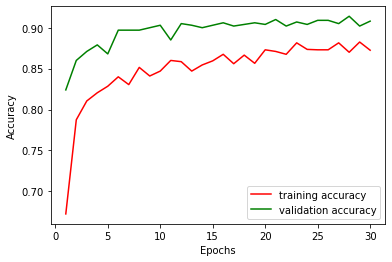

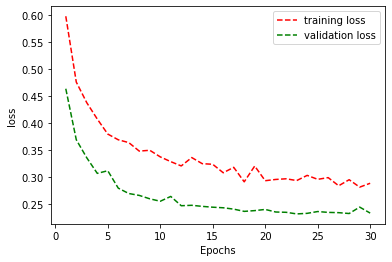

In [4]:
# 在卷积基上添加一个密集连接分类器

from tensorflow.keras import models
from tensorflow.keras import layers

model_1 = models.Sequential()
model_1.add(conv_base)
model_1.add(layers.Flatten())
model_1.add(layers.Dense(256,activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

#model.summary()
# “冻结”卷积基，即禁止卷积基预训练的参数在我们的这个训练过程中被修改
# 想冻结某一层，只需要设置这一层的trainable为False就可以了
print('the number of trainable weights before freezing : ',len(model_1.trainable_weights))
conv_base.trainable = False
print('the number of trainable weights after freezing : ',len(model_1.trainable_weights))

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

model_1.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model_1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model_1.save('cats_and_dogs_small_3.h5')

import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'r',label='training accuracy')
plt.plot(epochs,val_acc,'g',label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss,'r--',label='training loss')
plt.plot(epochs,val_loss,'g--',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


#### 从图片可以看出，使用了数据增强以后，validation精确度一直比training精确度高，但是二者随着训练论述的增加都在趋于平缓。这说明应该不是过拟合。两条直线还在缓慢上升，说明：1. 可以增加训练轮数 2. 问题出在卷积基上，卷积基的性能限制了分类器的性能。所以接下来进行下一步：模型微调。

#### 模型微调
模型微调(fine-tuning)与特征提取互为补充。即将用于特征提取的卷积基，原本是将其完全冻结，只训练自己的分类器；而现在将卷积基的部几层“解冻”，与自己新增加的全连接层分类器联合训练。  
因为对于卷积基来说，底部是更加通用的纹理提取特征，顶部几层用于提取更抽象的表示，所以可以微调顶部几层，与自己的分类器联合训练，以便让这些表示与我们要解决的问题更加相关。
#### 微调模型的步骤：
1. 在已经预训练好的基础网络(base network)上添加自定义网络
2. 冻结基础网络
3. 训练所添加的部分
4. 解冻基础网络的一些层
5. 联合训练解冻的这些层和添加的部分

#### 前面我们已经完成了前三步，接下来只需要进行后两步就可以了

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 11s 115ms/step - loss: 0.2764 - acc: 0.8800 - val_loss: 0.2320 - val_acc: 0.9060
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2616 - acc: 0.8875 - val_loss: 0.2574 - val_acc: 0.8990
Epoch 3/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2411 - acc: 0.8965 - val_loss: 0.2431 - val_acc: 0.9060
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2184 - acc: 0.9065 - val_loss: 0.1885 - val_acc: 0.9260
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.2152 - acc: 0.9130 - val_loss: 0.1828 - val_acc: 0.9270
Epoch 6/30
100/100 [==============================] - 11s 107ms/step - loss: 0.1922 - acc: 0.9195 - val_loss: 0.3101 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.1949 - acc: 0.9230

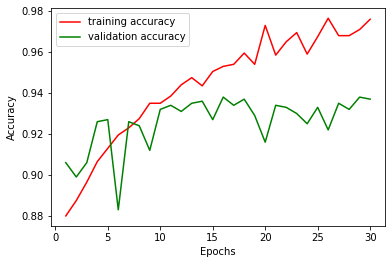

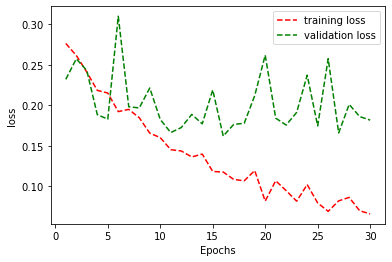

In [11]:
# 冻结直到某一层为止的所有层

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-5),
    metrics = ['acc'])

history = model_1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model_1.save('cats_and_dogs_small_3.h5')

import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'r',label='training accuracy')
plt.plot(epochs,val_acc,'g',label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_loss,'r--',label='training loss')
plt.plot(epochs,val_loss,'g--',label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

#### 可视化中间激活

(1, 150, 150, 3)


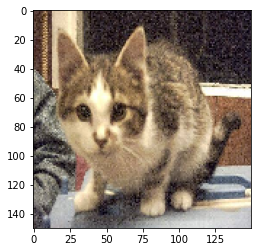

C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


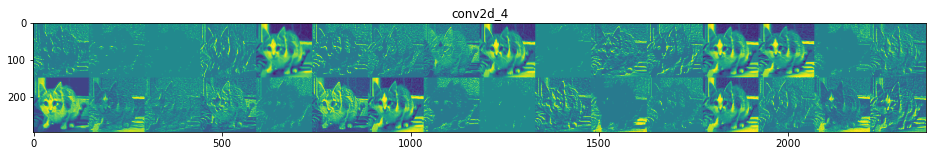

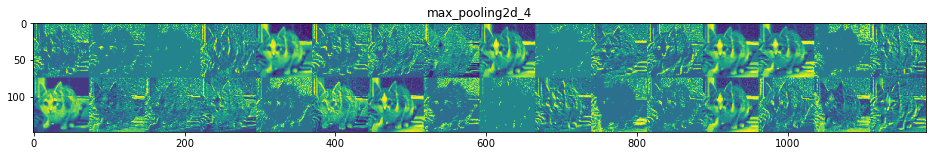

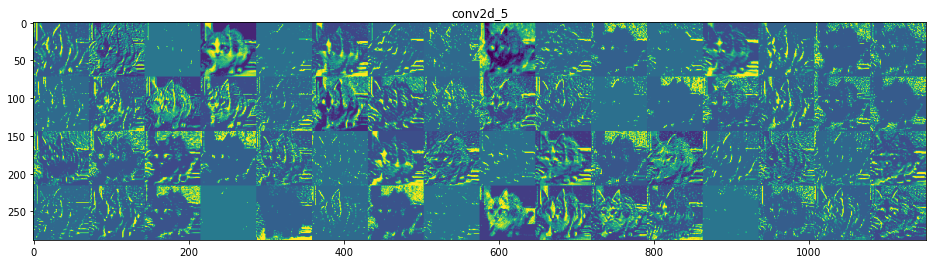

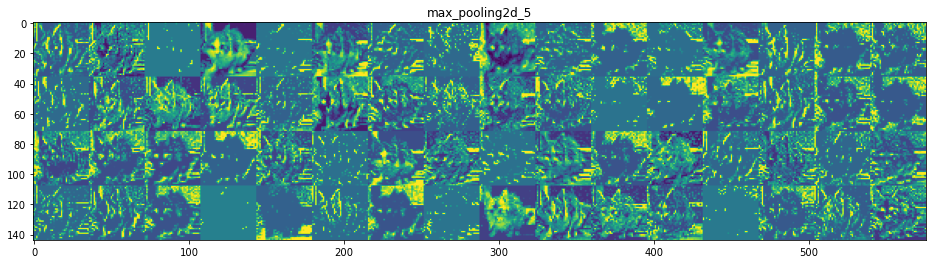

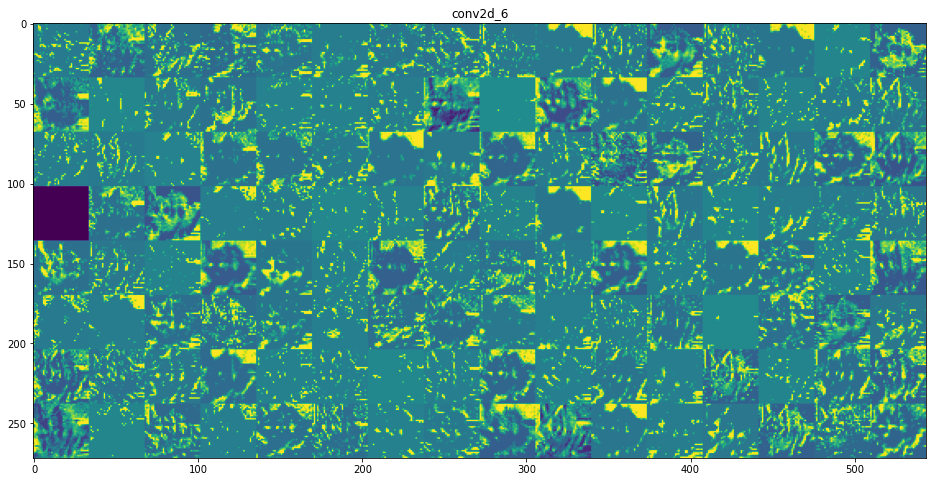

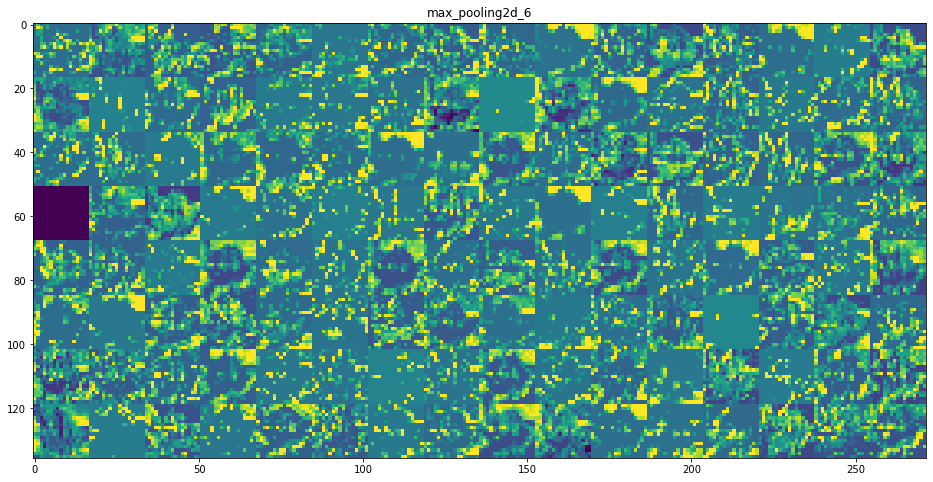

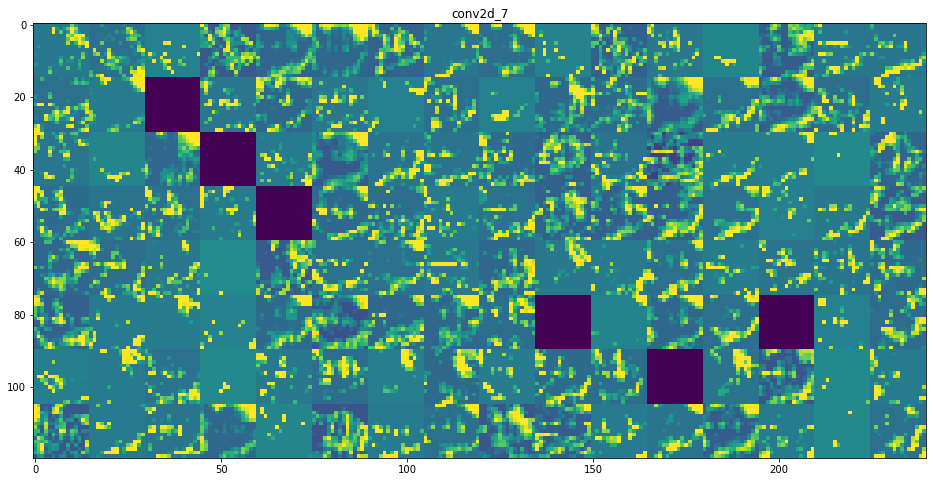

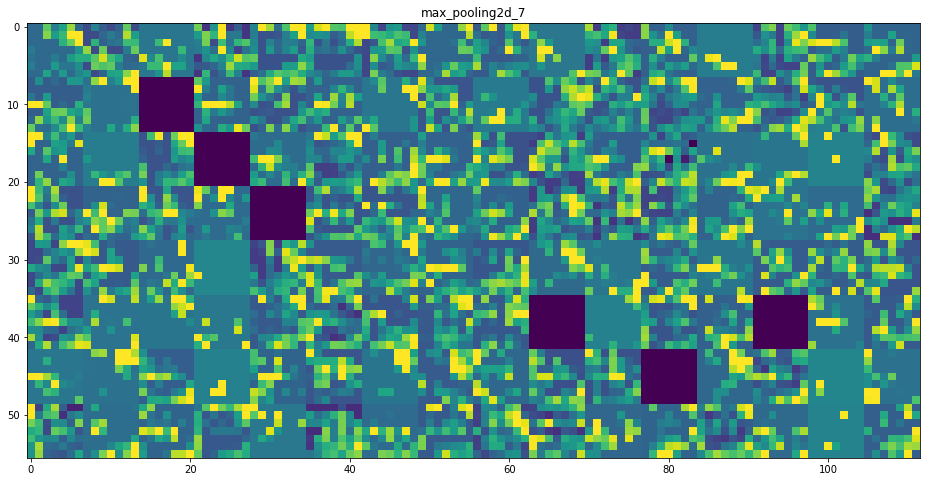

In [6]:
# 加载模型
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
# model.summary()

# 预处理单张图像
img_path = 'D:\\Python\\datasets\\dogs-vs-cats\\train\\cat.5002.jpg'

# 将图像处理为一个4-dim的张量
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150)) # jpg转rgb
img_tensor = image.img_to_array(img) #rgb转数组
img_tensor = np.reshape(img_tensor,(1,)+img_tensor.shape) # 三维变四维
img_tensor = img_tensor/255.

print(img_tensor.shape)

# 显示这张图像
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

# 创建一个keras模型，输入图像，输出所有卷积层和池化层的激活
from tensorflow.keras import models

layer_outputs = []
layer_names = []
for layer in model.layers[:8]:
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

images_per_row = 16

for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1] # 某一层中特征图的通道数
    size = layer_activation.shape[1] # 特征图的形状为(1,size,size,n_feature)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols,size*images_per_row))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            # 对特征图进行处理，使其看起来更美观
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')
